In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
df=pd.read_csv('EastWestAirlines.csv')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.duplicated().any()

False

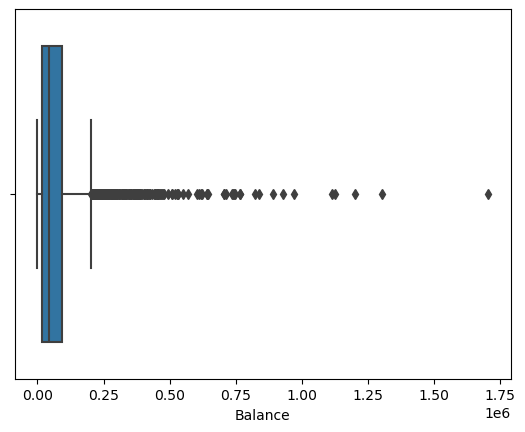

In [7]:
sns.boxplot(data=df,x='Balance')
plt.show()

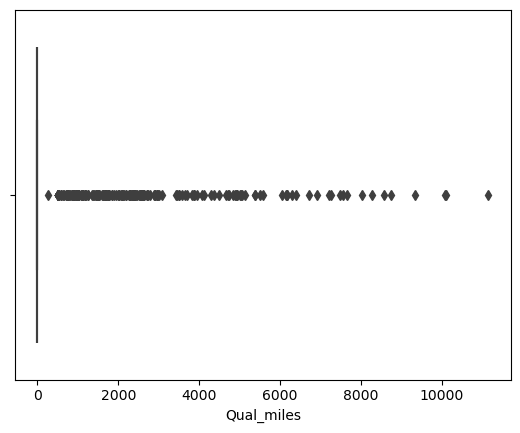

In [8]:
sns.boxplot(data=df,x='Qual_miles')
plt.show()

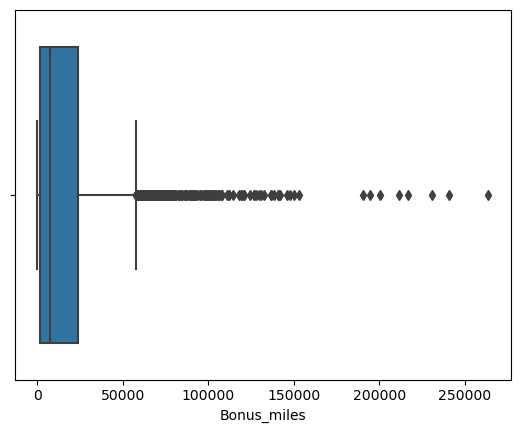

In [9]:
sns.boxplot(data=df,x='Bonus_miles')
plt.show()

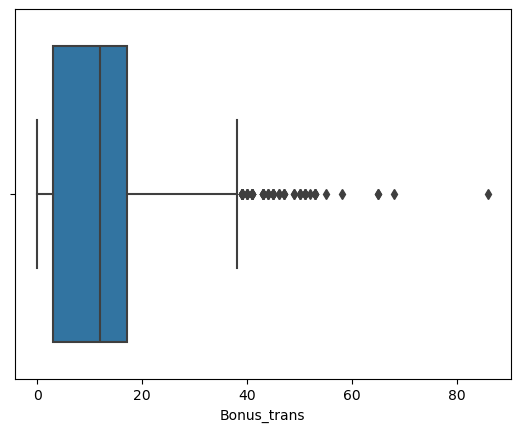

In [10]:
sns.boxplot(data=df,x='Bonus_trans')
plt.show()

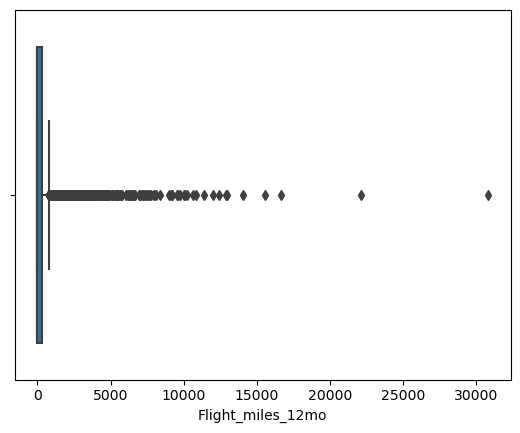

In [11]:
sns.boxplot(data=df,x='Flight_miles_12mo')
plt.show()

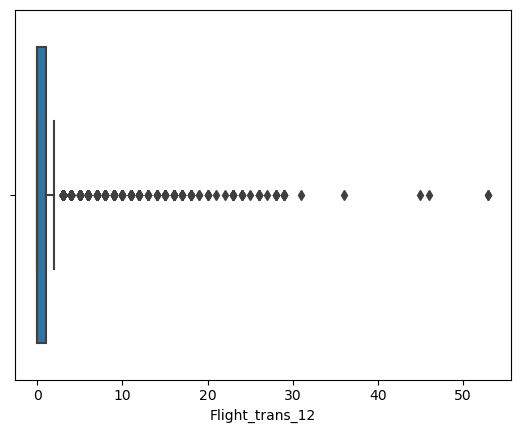

In [12]:
sns.boxplot(data=df,x='Flight_trans_12')
plt.show()

In [13]:
from sklearn.ensemble import IsolationForest

In [14]:
Outlier_features = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']

In [15]:
isolation_forest = IsolationForest(contamination=0.2, random_state=50)

In [16]:
isolation_forest.fit(df[Outlier_features])

IsolationForest(contamination=0.2, random_state=50)

In [17]:
Outliers = isolation_forest.predict(df[Outlier_features])

In [18]:
df_filtered = df[Outliers == 1]

In [19]:
print("Original Dataset Shape:", df.shape)
print("Filtered Dataset Shape:", df_filtered.shape)

Original Dataset Shape: (3999, 12)
Filtered Dataset Shape: (3199, 12)


<Figure size 2500x6000 with 0 Axes>

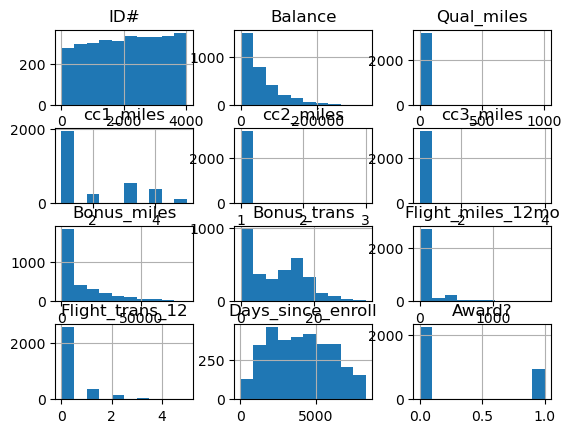

In [20]:
plt.figure(figsize=(25,60),frameon=True)
df_filtered.hist()
plt.show()

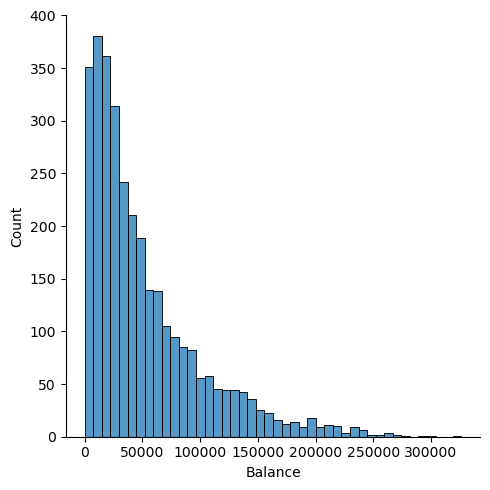

In [21]:
sns.displot(df_filtered,x='Balance')
plt.show()

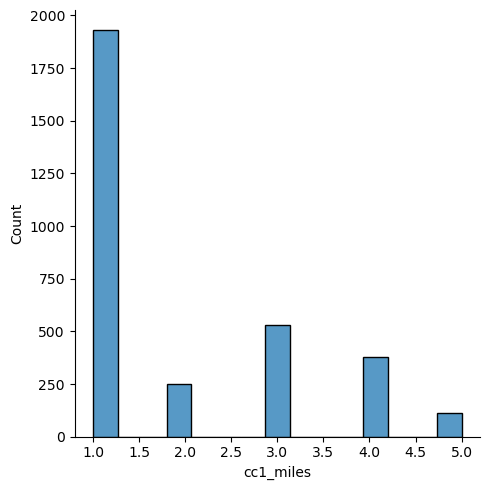

In [22]:
sns.displot(df_filtered,x='cc1_miles')
plt.show()

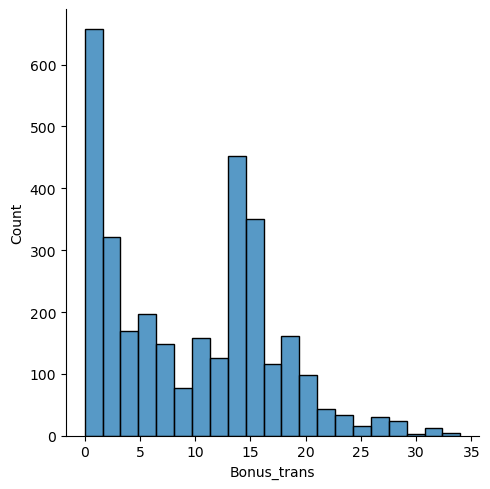

In [23]:
sns.displot(df_filtered,x='Bonus_trans')
plt.show()

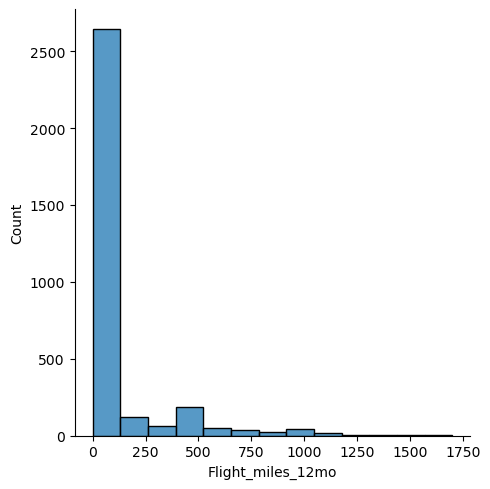

In [24]:
sns.displot(df_filtered,x='Flight_miles_12mo')
plt.show()

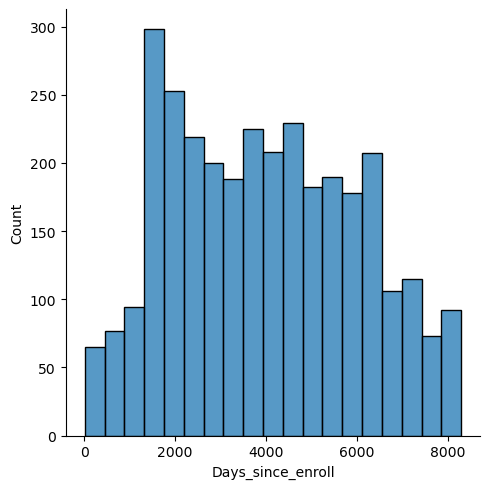

In [25]:
sns.displot(df_filtered,x='Days_since_enroll')
plt.show()

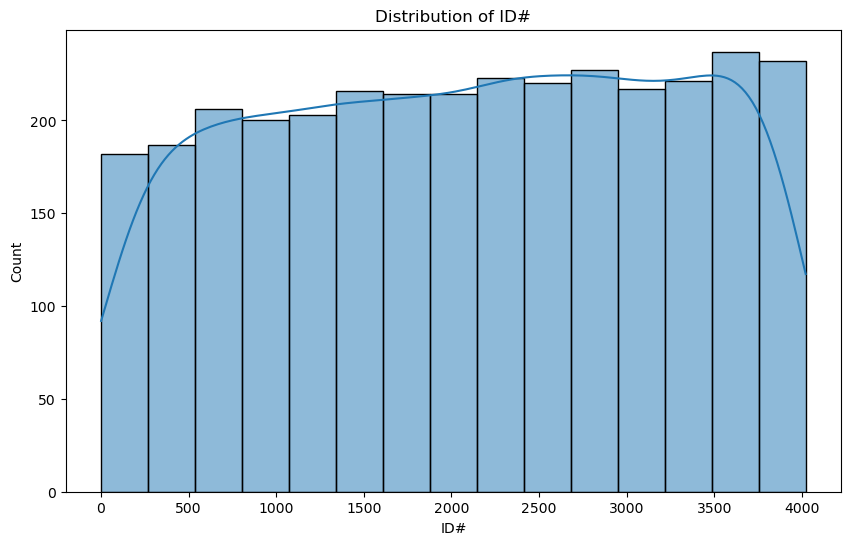

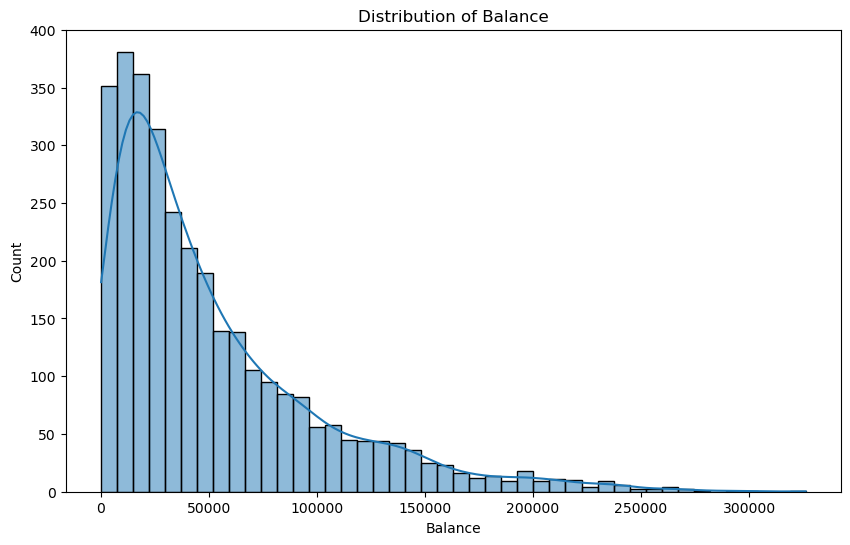

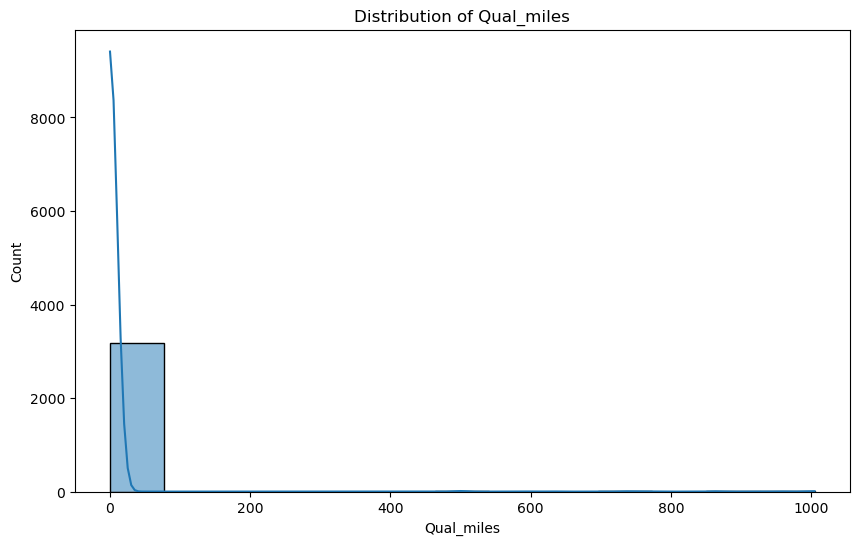

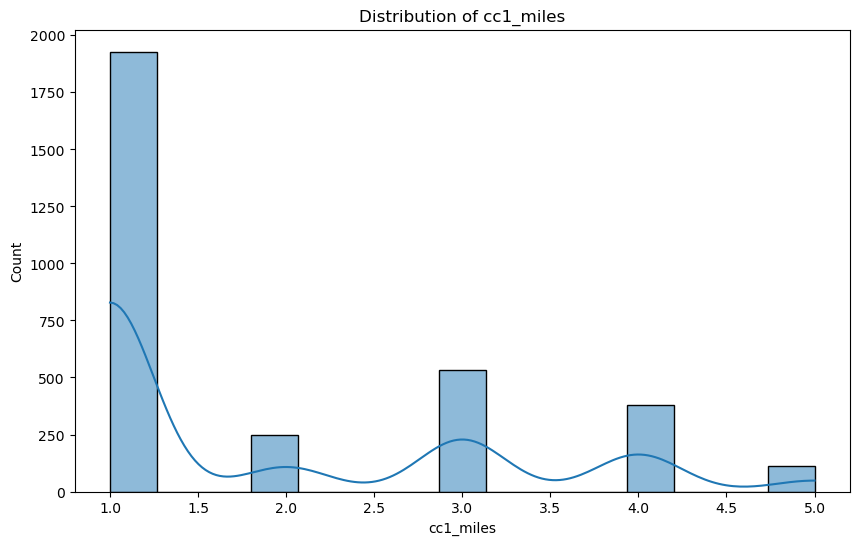

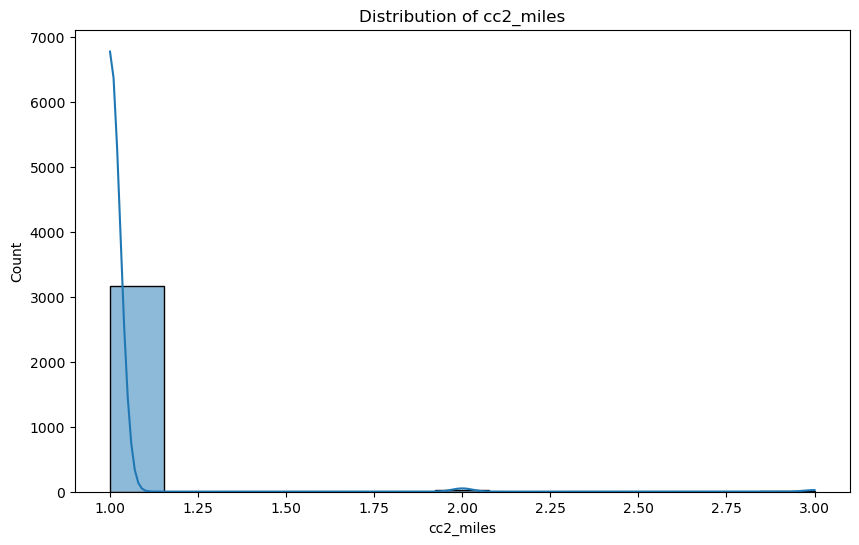

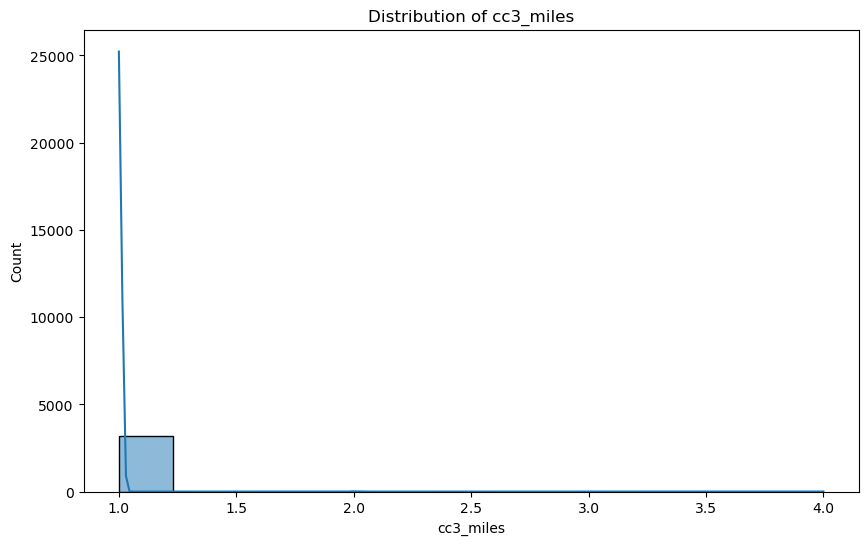

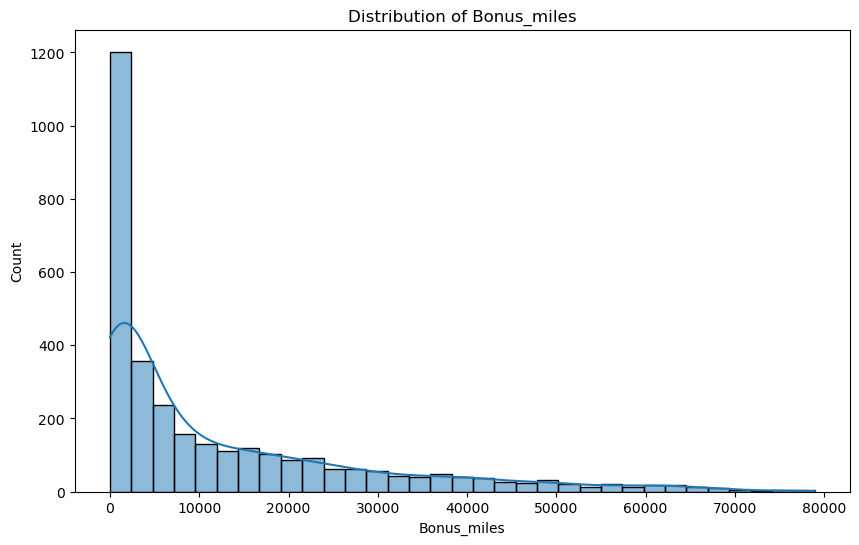

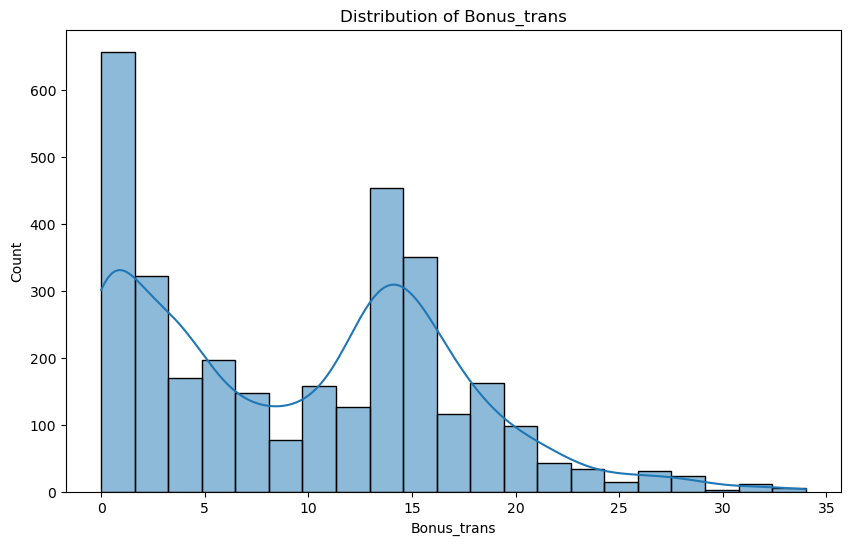

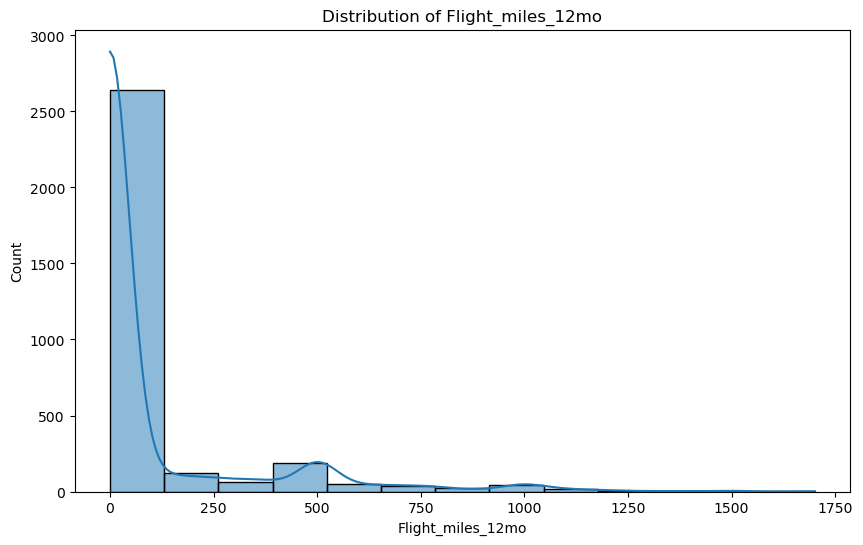

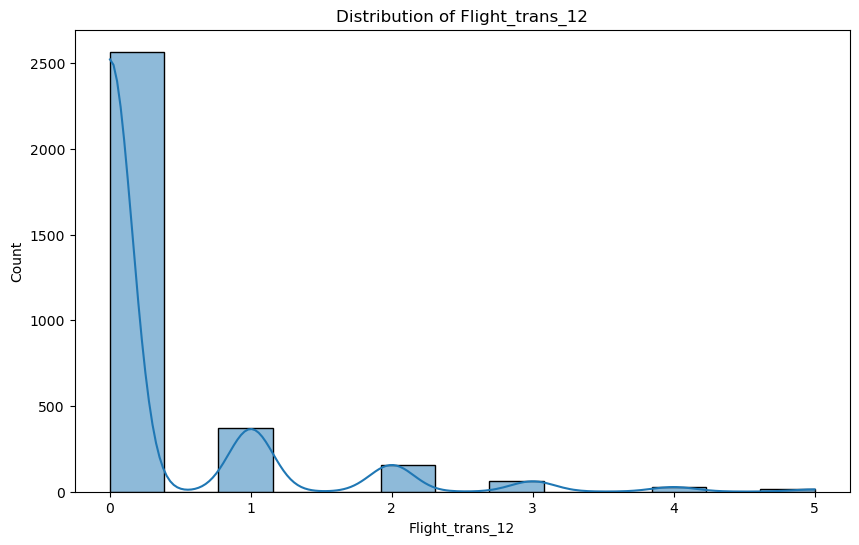

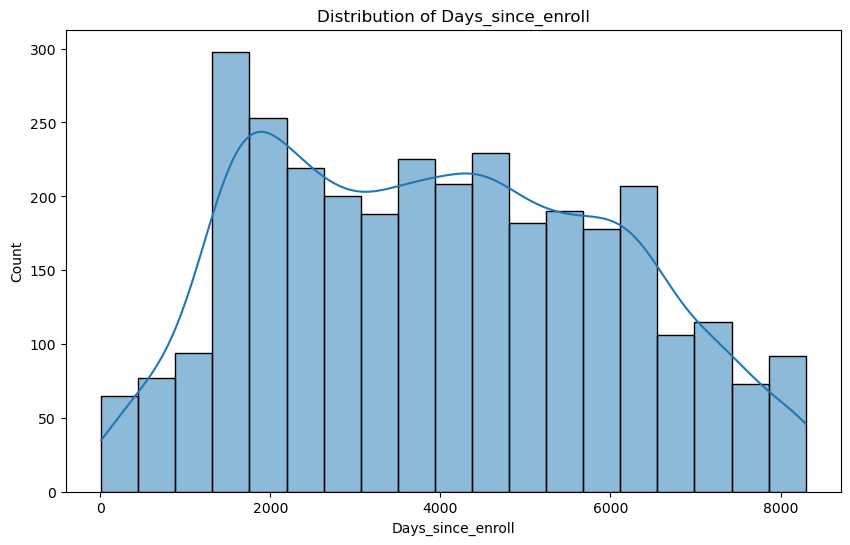

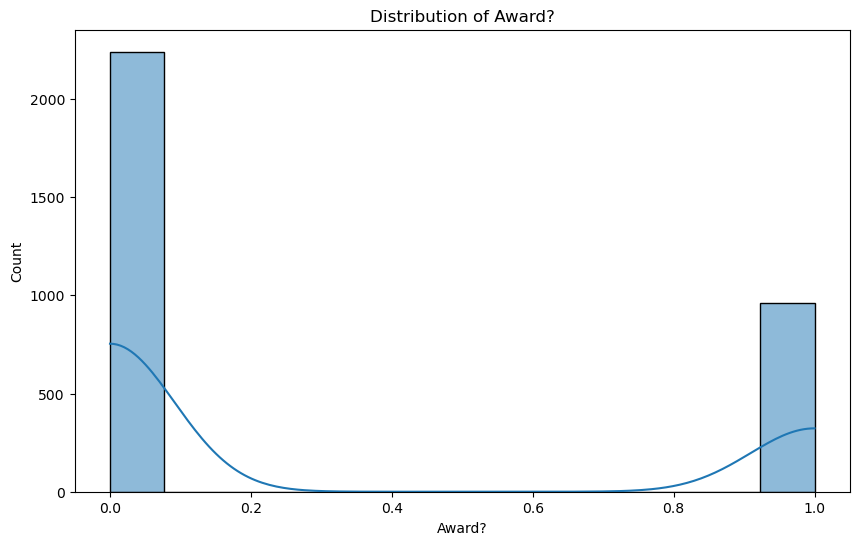

In [26]:

# Distribution of numerical features
numerical_features = df_filtered.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtered[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


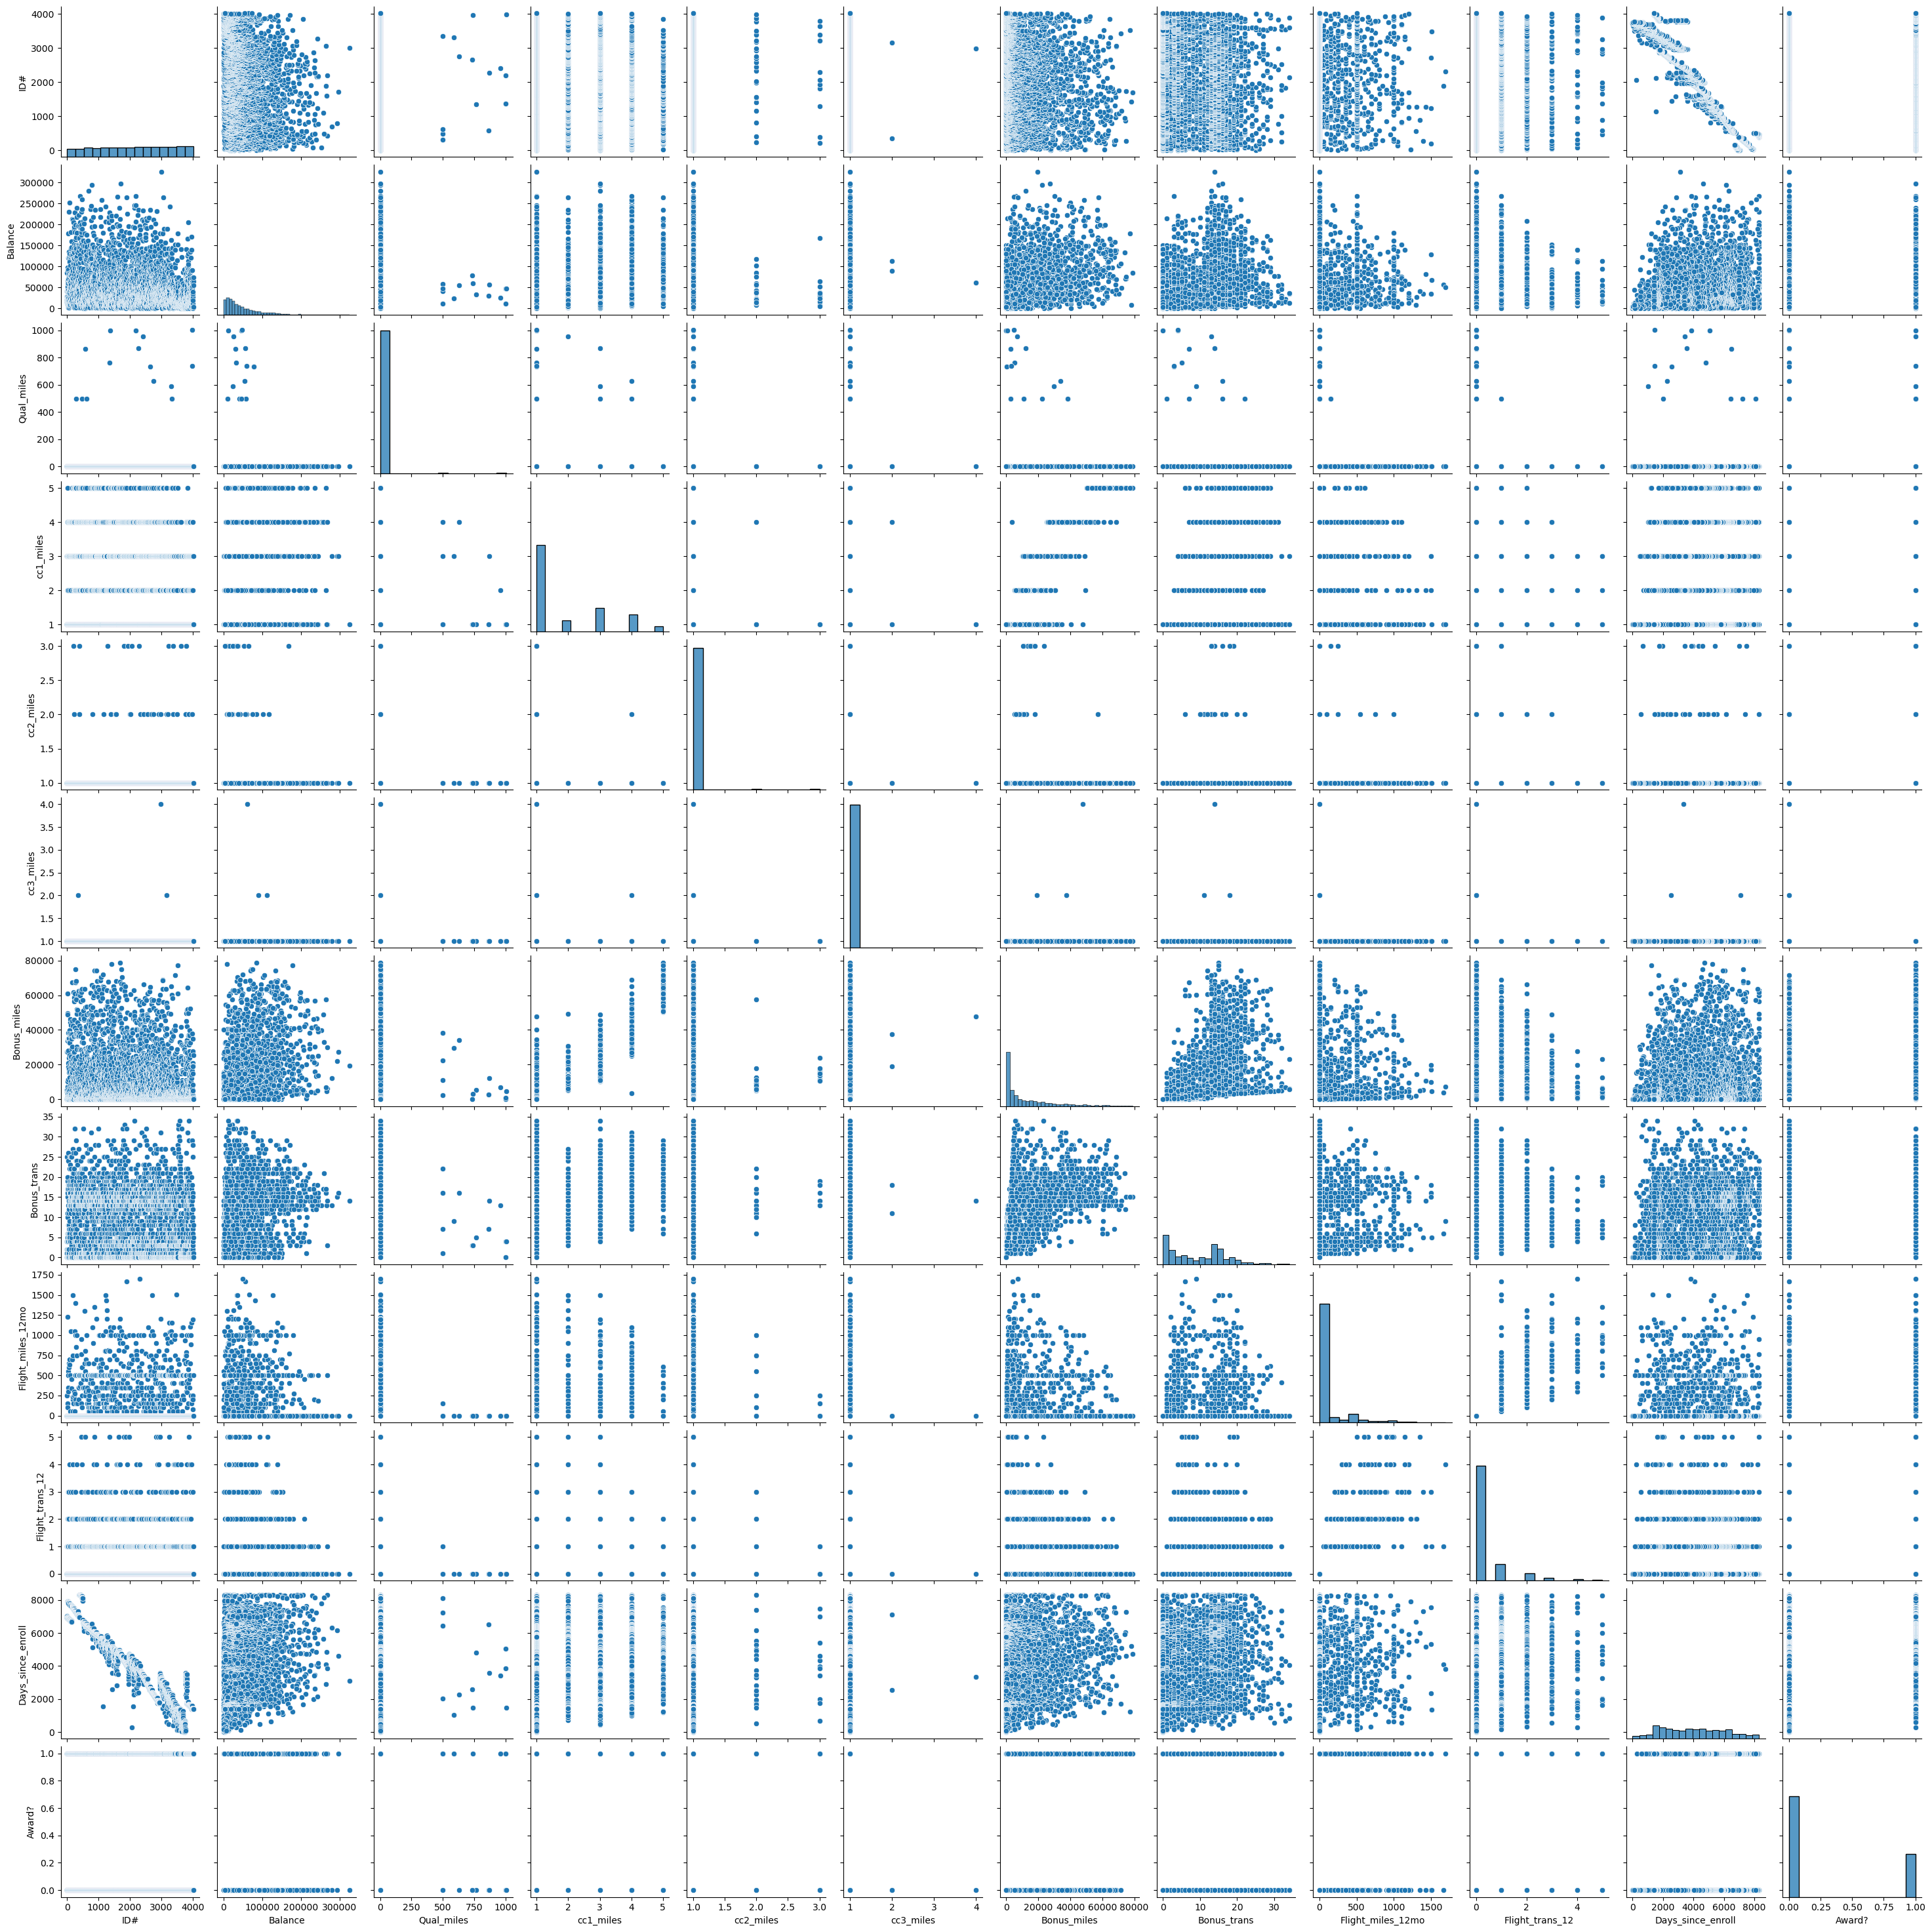

In [27]:
# Pairplot to see the relationships between numerical features
sns.pairplot(df_filtered[numerical_features])
plt.show()


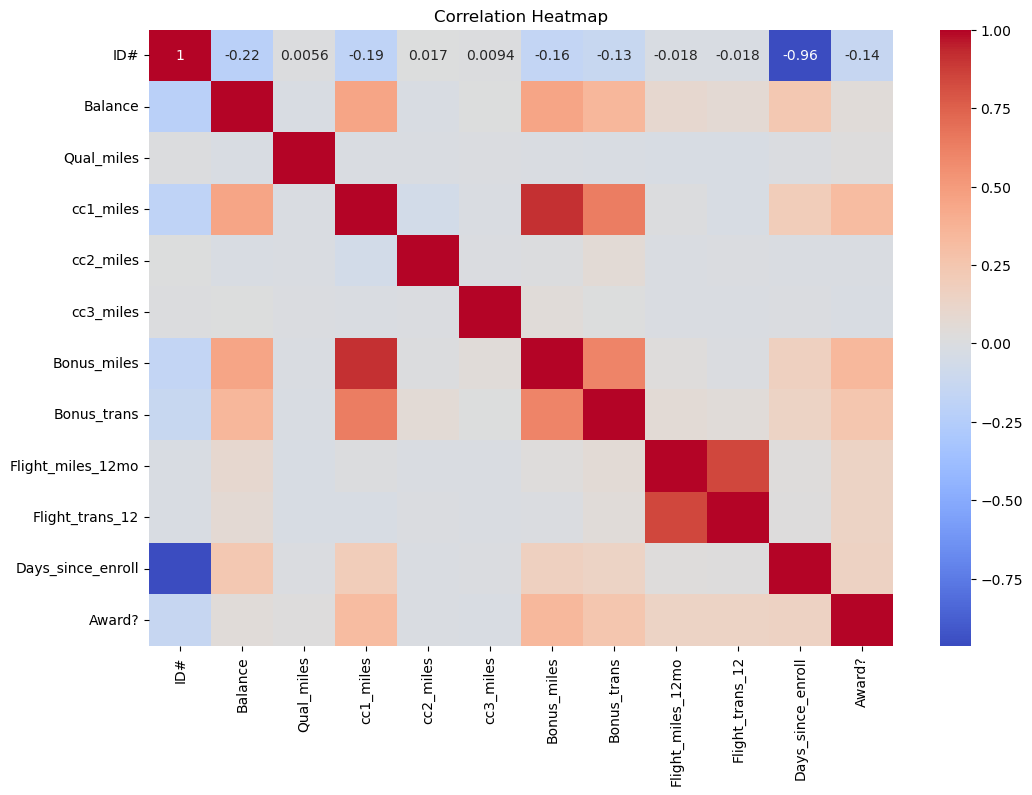

In [28]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
SS=StandardScaler()

In [31]:
df_filtered['Balance']=SS.fit_transform(df_filtered[['Balance']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_3960\1707566926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Balance']=SS.fit_transform(df_filtered[['Balance']])


In [32]:
df_filtered['Bonus_miles']=SS.fit_transform(df_filtered[['Bonus_miles']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_3960\791795475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Bonus_miles']=SS.fit_transform(df_filtered[['Bonus_miles']])


In [33]:
df_filtered['Flight_miles_12mo']=SS.fit_transform(df_filtered[['Flight_miles_12mo']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_3960\3460209947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Flight_miles_12mo']=SS.fit_transform(df_filtered[['Flight_miles_12mo']])


In [34]:
df_filtered['Days_since_enroll']=SS.fit_transform(df_filtered[['Days_since_enroll']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_3960\2910286319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Days_since_enroll']=SS.fit_transform(df_filtered[['Days_since_enroll']])


# Implementing Clustering Algorithms

## KMeans Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
Features=df_filtered.drop('ID#',axis=1)

In [37]:
Features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.476074,0,1,1,1,-0.767573,1,-0.400971,0,1.472348,0
1,-0.655173,0,1,1,1,-0.764999,2,-0.400971,0,1.456710,0
2,-0.210193,0,1,1,1,-0.519724,4,-0.400971,0,1.488963,0
3,-0.745095,0,1,1,1,-0.747112,1,-0.400971,0,1.448891,0
5,-0.712008,0,1,1,1,-0.778493,0,-0.400971,0,1.444004,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.670630,0,1,1,1,-0.243445,4,0.451688,1,-1.262817,1
3995,0.253322,0,1,1,1,-0.716923,5,-0.400971,0,-1.266726,1
3996,0.438721,0,3,1,1,0.818618,8,-0.400971,0,-1.263305,1
3997,0.062410,0,1,1,1,-0.747112,1,1.730676,1,-1.263794,0


In [38]:
kmeans=KMeans(n_clusters=2)

In [39]:
cluster=kmeans.fit(Features)

In [40]:
np.unique(cluster.labels_)

array([0, 1])

In [41]:
silhouette_score(Features,cluster.labels_)

0.9858130524835303

In [42]:
inertia=[]
no_clusters=range(10)

In [43]:
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(Features)
    inertia.append(kmeans.inertia_)
print(inertia)

[8986797.915598622, 746341.2150901363, 323744.9623828641, 181755.38474641263, 98907.28077737417, 78601.14988895929, 57347.11585562998, 41609.72412204686, 33754.85849961711, 28581.665319284766]


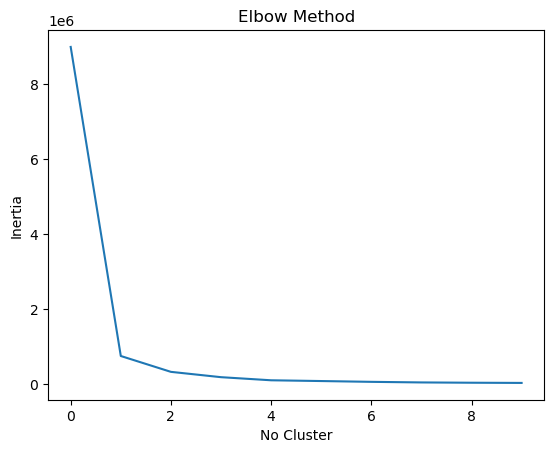

In [44]:
plt.plot(no_clusters,inertia)
plt.xlabel('No Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Hierarchial Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

## 1

In [46]:
agg= AgglomerativeClustering(n_clusters=4,linkage='single')

In [47]:
cluster1=agg.fit(Features)
cluster1

AgglomerativeClustering(linkage='single', n_clusters=4)

In [48]:
np.unique(cluster1.labels_)

array([0, 1, 2, 3], dtype=int64)

In [49]:
silhouette_score(Features,cluster.labels_)

0.9858130524835303

## 2

In [50]:
agg2= AgglomerativeClustering(n_clusters=4,linkage='complete')

In [51]:
cluster2=agg2.fit(Features)
cluster2

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [52]:
cluster2.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [53]:
silhouette_score(Features,cluster2.labels_)

0.9810514656291854

## 3

In [54]:
agg3= AgglomerativeClustering(n_clusters=4,linkage='average')

In [55]:
cluster3=agg3.fit(Features)
cluster3

AgglomerativeClustering(linkage='average', n_clusters=4)

In [56]:
cluster3.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [57]:
silhouette_score(Features,cluster3.labels_)

0.9810514656291854

## 4

In [58]:
agg4= AgglomerativeClustering(n_clusters=4,linkage='ward')

In [59]:
cluster4=agg4.fit(Features)
cluster4

AgglomerativeClustering(n_clusters=4)

In [60]:
cluster4.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [61]:
silhouette_score(Features,cluster4.labels_)

0.5822303476058207

## DBSCAN Clustring

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
df_new=pd.DataFrame(SS.fit_transform(df_filtered),columns=df_filtered.columns)
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.810363,-0.476074,-0.066457,-0.727264,-0.097663,-0.026664,-0.767573,-1.150847,-0.400971,-0.415948,1.472348,-0.654313
1,-1.809494,-0.655173,-0.066457,-0.727264,-0.097663,-0.026664,-0.764999,-1.016184,-0.400971,-0.415948,1.456710,-0.654313
2,-1.808626,-0.210193,-0.066457,-0.727264,-0.097663,-0.026664,-0.519724,-0.746857,-0.400971,-0.415948,1.488963,-0.654313
3,-1.807757,-0.745095,-0.066457,-0.727264,-0.097663,-0.026664,-0.747112,-1.150847,-0.400971,-0.415948,1.448891,-0.654313
4,-1.806020,-0.712008,-0.066457,-0.727264,-0.097663,-0.026664,-0.778493,-1.285510,-0.400971,-0.415948,1.444004,-0.654313
...,...,...,...,...,...,...,...,...,...,...,...,...
3194,1.677787,-0.670630,-0.066457,-0.727264,-0.097663,-0.026664,-0.243445,-0.746857,0.451688,0.858589,-1.262817,1.528321
3195,1.678656,0.253322,-0.066457,-0.727264,-0.097663,-0.026664,-0.716923,-0.612194,-0.400971,-0.415948,-1.266726,1.528321
3196,1.679524,0.438721,-0.066457,0.880558,-0.097663,-0.026664,0.818618,-0.208204,-0.400971,-0.415948,-1.263305,1.528321
3197,1.680393,0.062410,-0.066457,-0.727264,-0.097663,-0.026664,-0.747112,-1.150847,1.730676,0.858589,-1.263794,-0.654313


In [113]:
labels=DBSCAN(eps=0.1,min_samples=1).fit(df_new).labels_

In [114]:
np.unique(labels)

array([   0,    1,    2, ..., 2903, 2904, 2905], dtype=int64)

In [115]:
silhouette_score(df_new,labels)

0.0446789532161362

In [97]:
eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
min_nodes=range(1,11)

In [98]:
output=[]
for ep in eps:
    for mn in min_nodes:
        labels= DBSCAN(eps=ep,min_samples=mn).fit(df_new).labels_
        score= silhouette_score(df_new,labels)
        output.append([ep,mn,score])

In [99]:
DB= pd.DataFrame(output)

In [100]:
DB.iloc[:,2].max()

0.0446789532161362

In [101]:
DB[DB[2]==0.0446789532161362]

,0,1,2
0,0.1,1,0.044679


## Cluster Analysis and Interpretation

In [72]:
# Examining Cluster Centers (Centroids)
# For K-Means
kmeans.cluster_centers_

array([[-1.06991801e-01,  2.22044605e-15,  1.59719439e+00,
         1.04408818e+00,  1.00200401e+00, -2.14752144e-01,
         1.05951904e+01, -8.61449864e-02,  2.52505010e-01,
        -9.18347890e-03,  2.50501002e-01],
       [ 1.06632680e-01,  7.45000000e+02,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00, -6.02340388e-01,
         3.66666667e+00, -4.00970938e-01,  0.00000000e+00,
        -5.03238814e-01,  3.33333333e-01],
       [-3.86540057e-01,  9.90500000e+02,  1.25000000e+00,
         1.00000000e+00,  1.00000000e+00, -5.87303594e-01,
         5.25000000e+00, -4.00970938e-01,  0.00000000e+00,
        -2.60647905e-01,  5.00000000e-01],
       [-2.52930338e-01,  6.09000000e+02,  3.50000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.21712732e+00,
         1.25000000e+01, -4.00970938e-01,  0.00000000e+00,
        -1.13527019e+00,  5.00000000e-01],
       [-1.89763750e-01,  2.66453526e-15,  1.07530120e+00,
         1.00150602e+00,  1.00000000e+00, -5.09894843e-01,
  

In [73]:
# For Hierarchical Clustering
cluster1_centers = []
for i in range(1, 5):
    cluster1_data = Features[cluster1.labels_ == i]
    cluster1_center = np.mean(cluster1_data, axis=0)
    cluster1_centers.append(cluster1_center)

cluster1_centers = np.array(cluster1_centers)
print(cluster1_centers)


[[ 1.06632680e-01  7.45000000e+02  1.00000000e+00  1.00000000e+00
   1.00000000e+00 -6.02340388e-01  3.66666667e+00 -4.00970938e-01
   0.00000000e+00 -5.03238814e-01  3.33333333e-01]
 [-2.51823422e-01  5.36333333e+02  2.66666667e+00  1.00000000e+00
   1.00000000e+00  6.62842345e-01  1.18333333e+01 -2.94388568e-01
   1.66666667e-01  2.60574363e-01  6.66666667e-01]
 [ 9.67180136e-04  0.00000000e+00  1.90483668e+00  1.01413317e+00
   1.00157035e+00  2.54195150e-04  9.55213568e+00  1.68815008e-03
   3.27575377e-01 -1.47719991e-05  2.98994975e-01]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan]]


In [74]:
# For DBSCAN
clusterDB_centers = []
unique_labels = set(labels) - {-1}  # Exclude noise label (-1)
for label in unique_labels:
    clusterDB_data = Features[labels == label]
    clusterDB_center = np.mean(clusterDB_data, axis=0)
    clusterDB_centers.append(clusterDB_center)

clusterDB_centers = np.array(clusterDB_centers)
print(clusterDB_centers)


[[-0.29221989  0.          1.47954272  1.          1.         -0.39482737
   7.04452467 -0.40097094  0.         -0.15398202  0.        ]
 [-0.37079053  0.          2.26781857  1.          1.          0.16470174
  10.90712743 -0.40097094  0.          0.18173967  1.        ]
 [ 1.65484438  0.          3.          1.          1.          0.49544282
  15.1        -0.40097094  0.          1.480118    1.        ]
 [-0.11697643  0.          1.          1.          1.         -0.68974731
   3.36363636  1.73067646  1.          0.73896643  0.        ]
 [-0.61396545  0.          1.          1.          1.         -0.73854361
   2.13043478  0.42833258  1.         -0.5867967   0.        ]
 [-0.57026084  0.          1.          1.          1.         -0.69685827
   1.7         1.63475232  1.         -1.35605765  0.        ]]


In [75]:
## Calculating Cluster Sizes
## For K means Clustering
unique, counts = np.unique(cluster.labels_, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(cluster_sizes)

{0: 3184, 1: 15}


In [76]:
## For Heirarchical Clustering
unique, counts = np.unique(cluster1.labels_, return_counts=True)
cluster1_sizes = dict(zip(unique, counts))
print(cluster1_sizes)

{0: 6, 1: 3, 2: 6, 3: 3184}


In [77]:
## For DBSCAN Clustering
unique, counts = np.unique(labels, return_counts=True)
clusterDB_sizes = dict(zip(unique, counts))
print(clusterDB_sizes)

{-1: 1020, 0: 1662, 1: 463, 2: 10, 3: 11, 4: 23, 5: 10}


Insights:

KMeans Clustering-

Cluster-1= This cluster has most of data points in it.

Cluster-2= This cluster contains very low amount of data points.


Hierarchial Clustering-

cluster-1= This contains very low number of data points.

cluster-2= This contains very low number of data points.

cluster-3= This contains very low number of data points.

cluster-4= This contains almost all the data points in comparision.


DBSCAN Clustering-

cluster-1(-1)= This cluster contains all the noises.

cluster-2= This cluster contains half of the data points.

cluster-3= This contains very low number of data points.

cluster-4= This contains very low number of data points.

cluster-5= This contains very low number of data points.

cluster-6= This contains very low number of data points.

cluster-7= This contains very low number of data points.

# Visulaization

## KMeans 

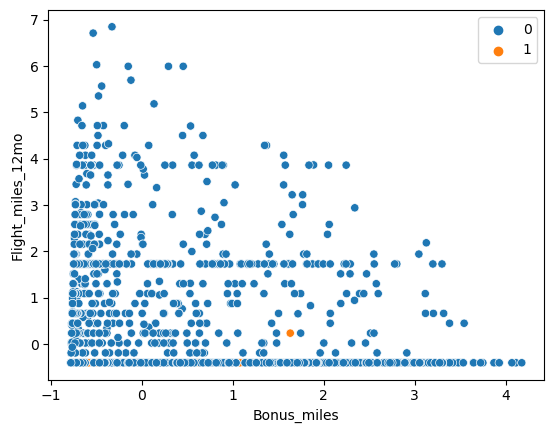

In [80]:
sns.scatterplot(data=df_filtered,x='Bonus_miles',y='Flight_miles_12mo',hue=cluster.labels_)
plt.show()

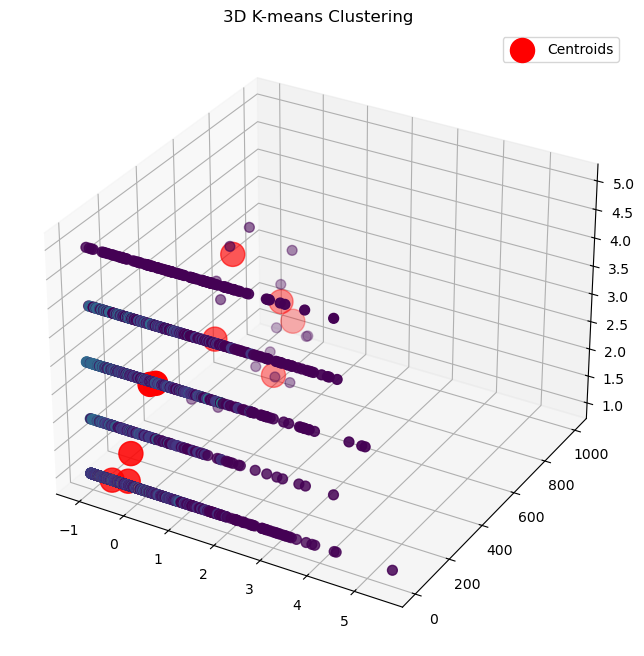

In [82]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Features.iloc[:, 0], Features.iloc[:, 1], Features.iloc[:, 2], c=labels, cmap='viridis', s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')
plt.title('3D K-means Clustering')
plt.legend()
plt.show()


## Hierarchical Clustering Visulaization

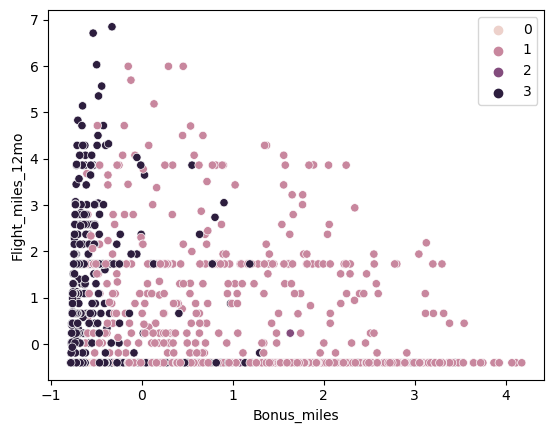

In [81]:
sns.scatterplot(data=df_filtered,x='Bonus_miles',y='Flight_miles_12mo',hue=cluster4.labels_)
plt.show()

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Varun Sayam\Anaconda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1000 with 0 Axes>

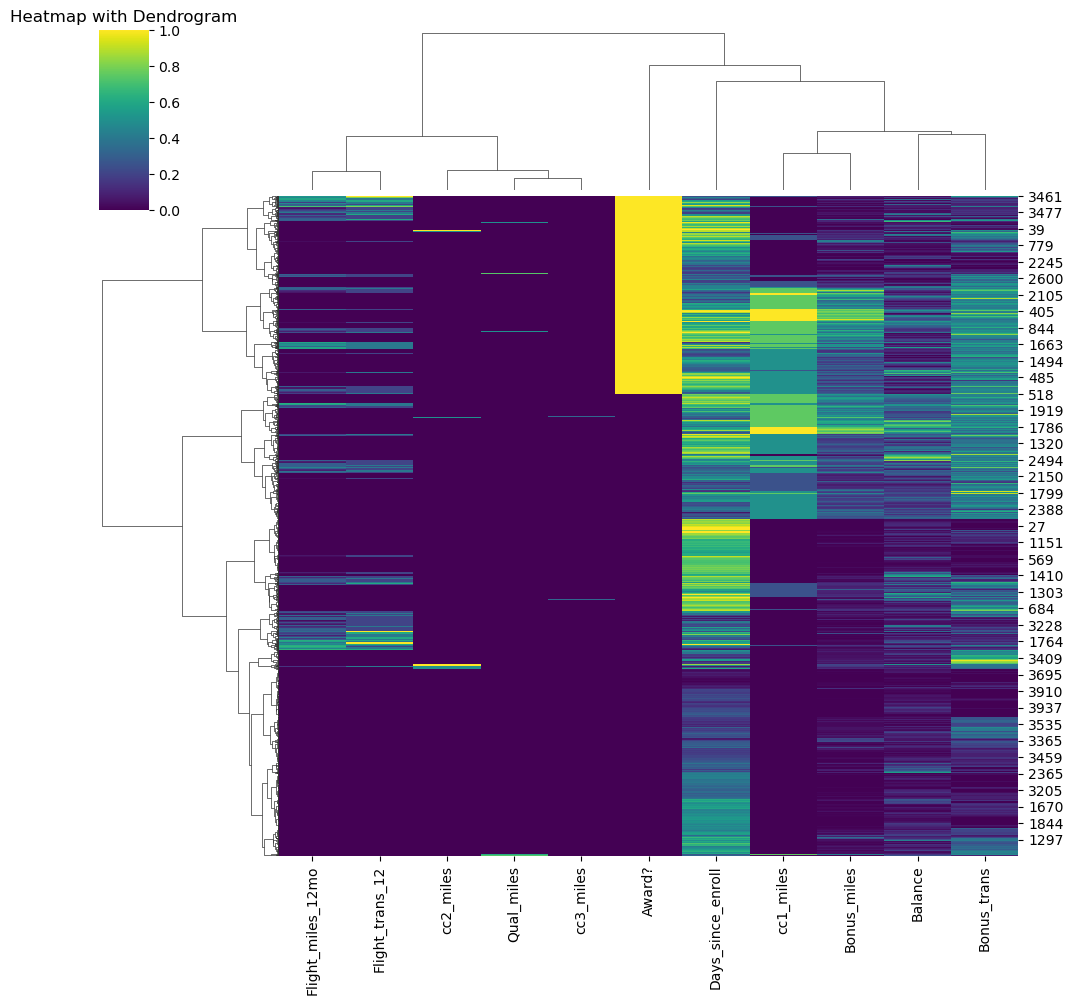

In [83]:
plt.figure(figsize=(20,10))
sns.clustermap(Features, method='ward', cmap='viridis', standard_scale=1)
plt.title('Heatmap with Dendrogram')
plt.show()

## DBSCAN 

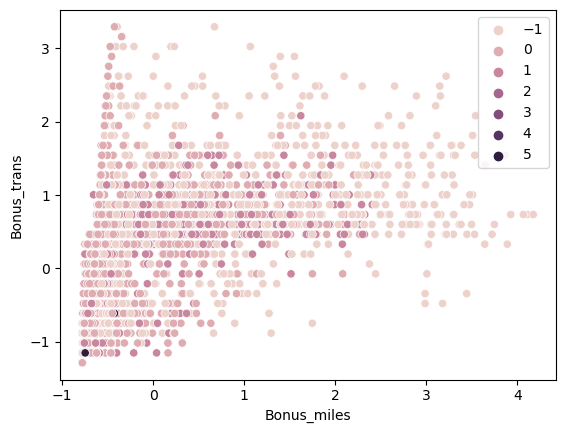

In [79]:
sns.scatterplot(data=df_new,x='Bonus_miles',y='Bonus_trans',hue=labels)
plt.show()

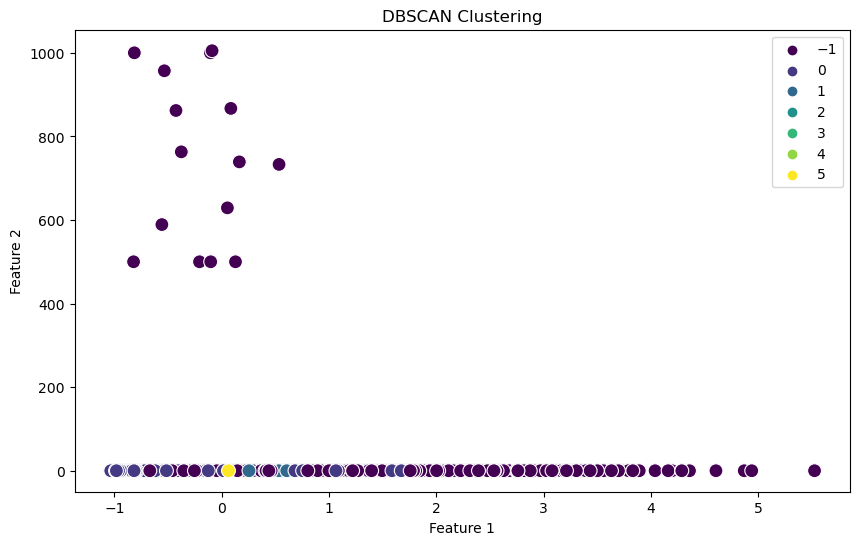

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Features.iloc[:, 0], y=Features.iloc[:, 1], hue=labels, palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluation and Performance Metrics:

In [102]:
## For KMeans 
silhouette_score(Features,cluster.labels_)

0.9858130524835303

In [116]:
## For DBSCAN
silhouette_score(df_new,labels)

0.0446789532161362

From Above Silhouette_ Scores we can conclude that:

1)KMeans score indicates that the sample is far from the neighboring clusters.

2)DBSCAN Score indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

3)KMeans shows better than DBscan clustering for current examples